# ▶ TASK-4 : SALES PREDICTION USING PYTHON

Author: AVIK DAS

Batch: SEPT BATCH A5

Domain: DATA SCIENCE

IMPORT ALL IMPORTANT LIBRARIES

In [1]:
#Import numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET


In [2]:
# Load The Data
df = pd.read_csv("/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9



**Aim:- Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as make informed decisions regarding advertising costs.<br>
optimize advertising strategies and maximize sales potential.**

Use the dataset to analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. Let's visuaslize

# DATA INSPECTION

In [ ]:
# Show The the 1st 5 records
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Showing the last 5 records
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Basic Observations


*   Avg expense spend is highest on TV
*   Max sale is 27 and min is 1.6
*   Avg expense spend is lowest on Radio






# DATA CLEANING

In [ ]:
# Checking if there is any null values in the dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

we can see there is no null values.

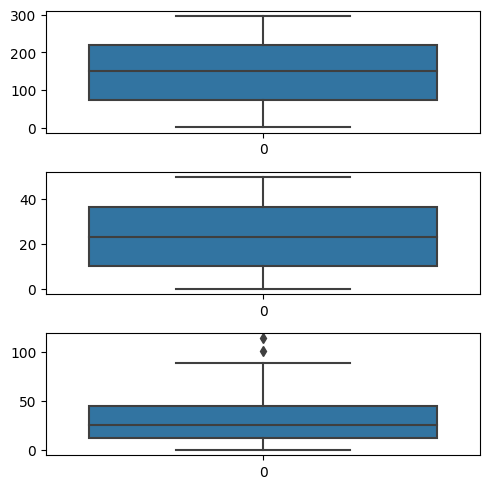

In [3]:
# Outlair Detection
fig,axs = plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Radio'],ax=axs[1])
plt3 = sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

# PAIRPLOT

Making a pairplot where I put TV, Radio and Newspaper in X axis and Sales in Y axis

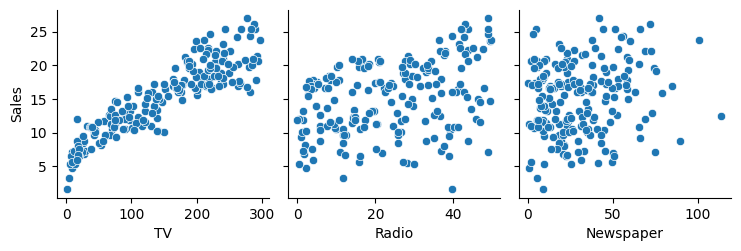

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()


## Pair Plot Observation  <br>
**When advertising cost increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.**

# HISTOGRAM

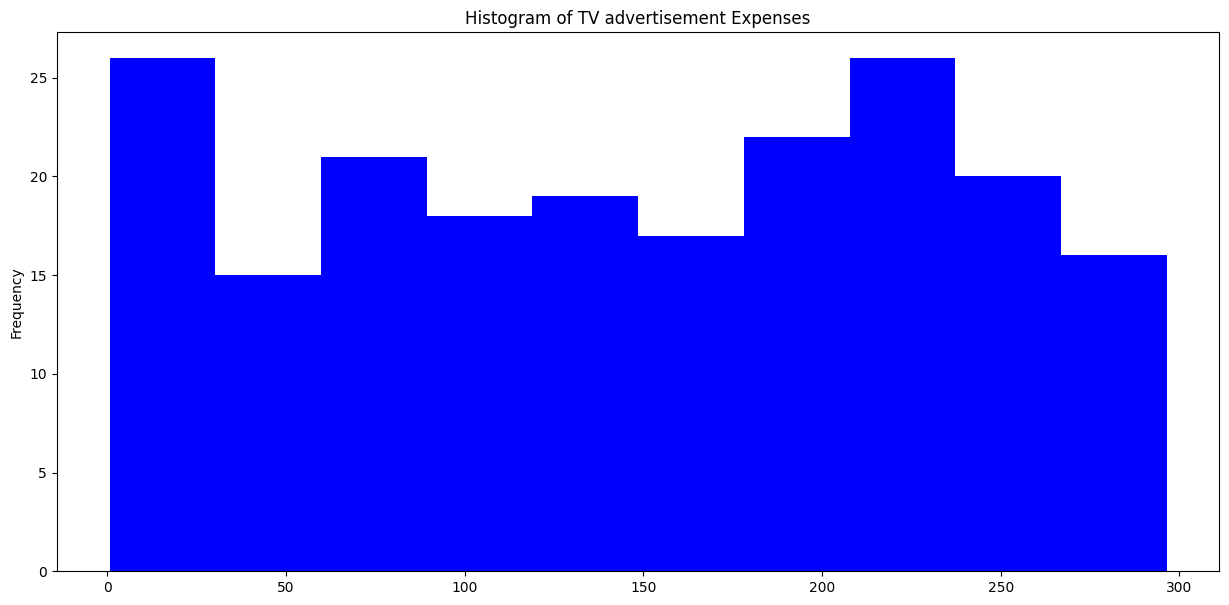

In [ ]:
plt.figure(figsize=(15,7))

df['TV'].plot.hist(bins=10,color="blue",title="Histogram of TV advertisement Expenses")

plt.show()


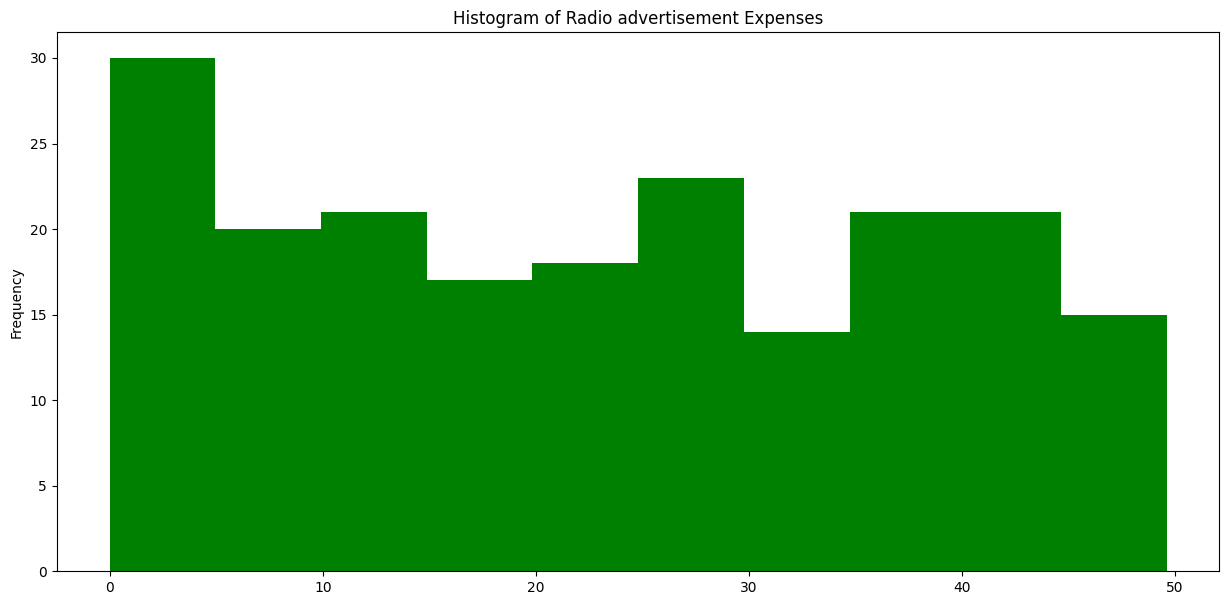

In [ ]:
plt.figure(figsize=(15,7))

df['Radio'].plot.hist(bins=10, color="green", xlabel="Radio",title="Histogram of Radio advertisement Expenses")
plt.show()

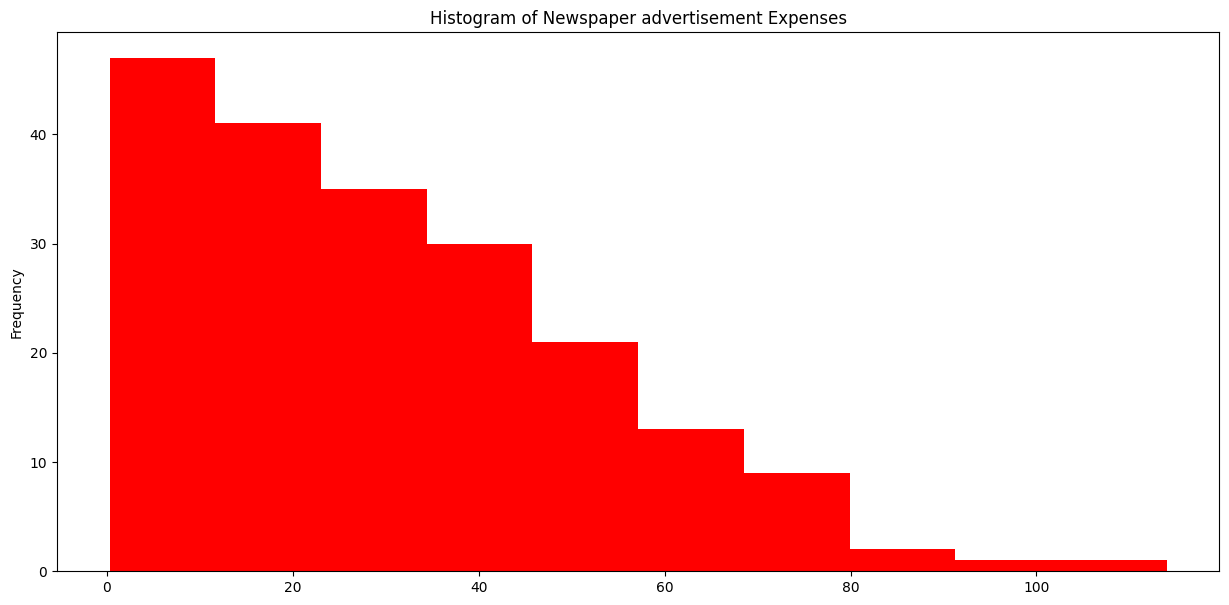

In [ ]:
plt.figure(figsize=(15,7))

df['Newspaper'].plot.hist(bins=10, color="red", xlabel="Newspaper",title="Histogram of Newspaper advertisement Expenses")
plt.show()

## Histogram Observation <br>
**The majority sales is the result of low advertising cost in Newspaper**

# CORRELATION HEATMAP

Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Finally, a value of zero indicates no relationship between the two variables.

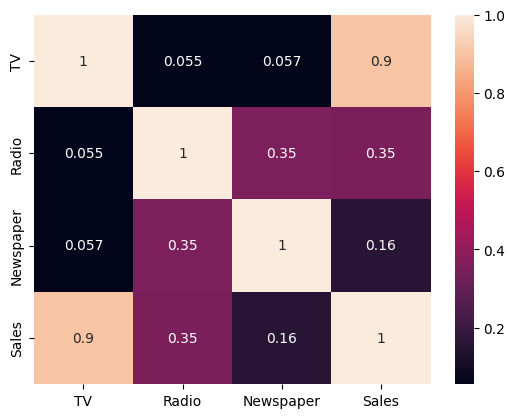

In [ ]:
sns.heatmap(df.corr(),annot = True)
plt.show()

**As we can see from the Pairplot and the Heatmap, the variable TV seems to be most correlated with Sales as the correlation coefficients between them is 0.9 which is close to 1.<br>Let's train our model using Linear regression as it is correlated only with TV.**

# Simple Linear Regression

In [4]:
X = df['TV']
y = df['Sales']

# Train-Test-Split

Now we need to split our variables into training and testing sets.We will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in our train dataset and the rest 30% in our test dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [6]:
# Take a look at the train dataset
X_train.head()

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
Name: TV, dtype: float64

In [ ]:
y_train.head()

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
Name: Sales, dtype: float64

In [ ]:
X_train.shape

(140,)

In [ ]:
X_test.shape

(60,)

# Building a Linear Model

In [7]:
import statsmodels.api as sm

In [8]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

In [9]:
# Print the parameters i.e the intercept and the slope of the regression line fitted
lr.params

const    7.143822
TV       0.054732
dtype: float64

In [10]:
# Performing a summary operation list out all the different parameters of the regression line fitted

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.56e-51
Time:                        18:26:07   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438      0.400     17.838      0.0

## Looking for the key Statistics from the summary

#### The Values we are concerned with are --


*   The Co-efficients and significance (p-value)
*   R-squared
*   F statistic and its significance



#### 1. The coefficient for TV is 0.054, with a very low p value

The coefficient is statistically significant so the association is not purely by chance

#### 2. R-squared is 0.806

Meaning that 81.6% of variance in sales explained by TV

This is a descent R-squared value

#### 3. F -statistics has a very low p-value (practically low)

Meaning that the model fit is statistically significant and the explained variance isn't purely by chance.

The fit is significant. Let's vizualize how well the model fit the data

from the parameter that we get, our linear regression equation becomes:

**Sales = 6.948 + 0.054 x TV**


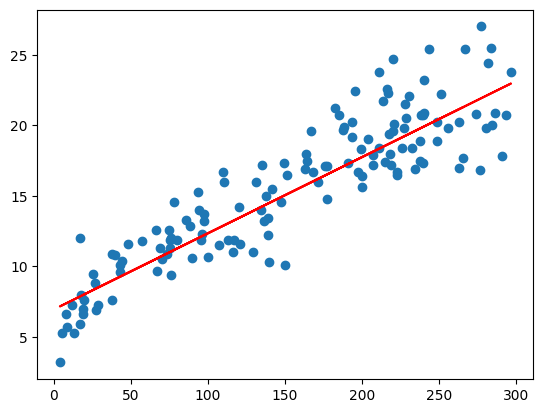

In [11]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948 + 0.054*X_train,'r')
plt.show()

# Model Evaluation

### Residual Analysis
To validate assumption of the model, and hence the reliabily for inference

## Distribution Od the error term

We need to check if the error term are also normally distributed(which is infact,one of the major assumption of linear regression). Let us plot the histogram of the error terms and see what is looks like.

In [12]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-13-075593a05a28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


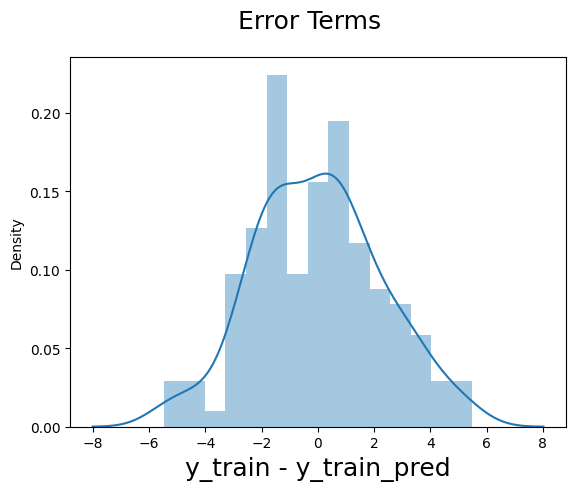

In [13]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize = 18)
plt.xlabel('y_train - y_train_pred',fontsize = 18 )
plt.show()

The residuals are following the normally distributed with a mean 0. All sets good.

### Looking for patterns in the residuals

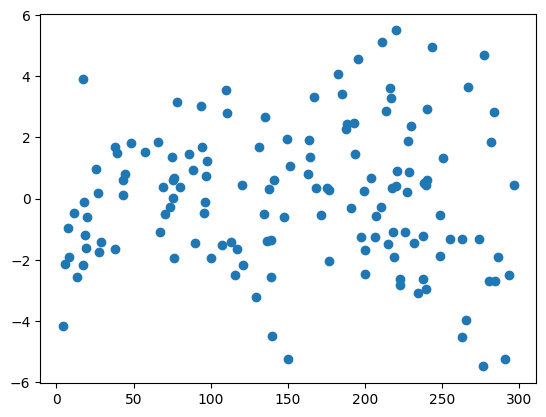

In [14]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit is not by chance  and has decent predictive power. The normality of residual terms allows some some inference on the coefficients. Although, the variance of residuals incresing with X indicates that there is significant variation that this model is unable to explain.

# Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [15]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [16]:
y_pred.head()

18     10.931276
170     9.880422
107    12.091594
98     22.999681
177    16.459208
dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Looking at the RMSE


In [18]:
# Returns the mean squared error ; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred))

2.359987117224847

### Checking the R-squared on the test set

In [19]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8150168765722069

# Visualizing the fit on the test set

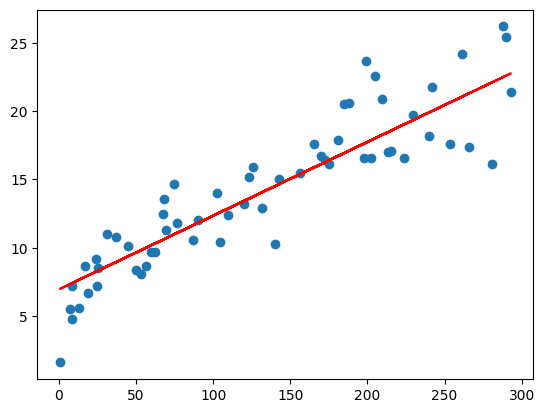

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.948 + 0.054 * X_test, 'r')
plt.show()